DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS

In [2]:
# Import libraries
import numpy as np # numeric
import pandas as pd # read data
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [3]:
# Read csv Dataset
li_small = pd.read_csv("LI-Small_Trans.csv", header=0, parse_dates=[0])
hi_small = pd.read_csv("HI-Small_Trans.csv", header=0, parse_dates=[0])

In [4]:
# Data Shape
print("Shape of li_small:", li_small.shape)
print("Shape of hi_small:", hi_small.shape)

Shape of li_small: (6924049, 11)
Shape of hi_small: (5078345, 11)


In [5]:
# Data types
types = pd.DataFrame({
    "li_small": li_small.dtypes,
    "hi_small": hi_small.dtypes,
})

print("Data Types of li_small and hi_small:")
print(types)

Data Types of li_small and hi_small:
                          li_small        hi_small
Timestamp           datetime64[ns]  datetime64[ns]
From Bank                    int64           int64
Account                     object          object
To Bank                      int64           int64
Account.1                   object          object
Amount Received            float64         float64
Receiving Currency          object          object
Amount Paid                float64         float64
Payment Currency            object          object
Payment Format              object          object
Is Laundering                int64           int64


In [6]:
# First 5 Records
print("First 5 Records of li_small:")
print(li_small.head(5))

print("First 5 Records of hi_small:")
print(hi_small.head(5))

First 5 Records of li_small:
            Timestamp  From Bank    Account  To Bank  Account.1  \
0 2022-09-01 00:08:00         11  8000ECA90       11  8000ECA90   
1 2022-09-01 00:21:00       3402  80021DAD0     3402  80021DAD0   
2 2022-09-01 00:00:00         11  8000ECA90     1120  8006AA910   
3 2022-09-01 00:16:00       3814  8006AD080     3814  8006AD080   
4 2022-09-01 00:00:00         20  8006AD530       20  8006AD530   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0       3195403.00          US Dollar   3195403.00        US Dollar   
1          1858.96          US Dollar      1858.96        US Dollar   
2        592571.00          US Dollar    592571.00        US Dollar   
3            12.32          US Dollar        12.32        US Dollar   
4          2941.56          US Dollar      2941.56        US Dollar   

  Payment Format  Is Laundering  
0   Reinvestment              0  
1   Reinvestment              0  
2         Cheque              0  
3   R

In [7]:
# Data Info
li_small.info(), hi_small.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6924049 entries, 0 to 6924048
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Account             object        
 3   To Bank             int64         
 4   Account.1           object        
 5   Amount Received     float64       
 6   Receiving Currency  object        
 7   Amount Paid         float64       
 8   Payment Currency    object        
 9   Payment Format      object        
 10  Is Laundering       int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 581.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5078345 entries, 0 to 5078344
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Timestamp           datetime64[ns]
 1   From Bank           int64         
 2   Accoun

(None, None)

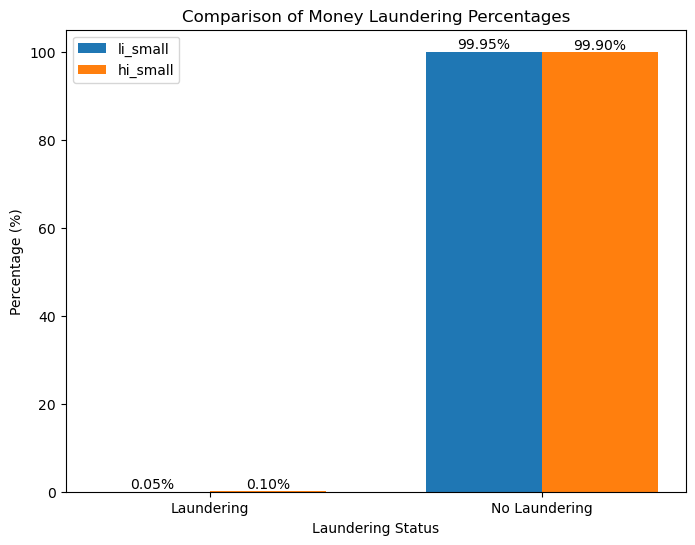

Laundering Summary:
               li_small - Percentage  hi_small - Percentage
Is Laundering                                              
0                              99.95                   99.9
1                               0.05                    0.1


In [8]:
# Laundering Counts and Percentages
li_laundering_counts = li_small['Is Laundering'].value_counts()
hi_laundering_counts = hi_small['Is Laundering'].value_counts()

li_laundering_percentages = (li_small['Is Laundering'].value_counts(normalize=True) * 100).round(2)
hi_laundering_percentages = (hi_small['Is Laundering'].value_counts(normalize=True) * 100).round(2)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(2)  # Two categories
width = 0.35  # Width of the bars

bars1 = ax.bar(x - width/2, [li_laundering_percentages[1], li_laundering_percentages[0]], width, label='li_small')
bars2 = ax.bar(x + width/2, [hi_laundering_percentages[1], hi_laundering_percentages[0]], width, label='hi_small')

# Add titles, labels, and legends
ax.set_xlabel('Laundering Status')
ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Money Laundering Percentages')
ax.set_xticks(x)
ax.set_xticklabels(['Laundering', 'No Laundering'])
ax.legend()

# Annotate the bars with percentages
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width()/2, height), ha='center', va='bottom')

plt.show()

laundering_summary = pd.DataFrame({
    "li_small - Percentage": li_laundering_percentages,
    "hi_small - Percentage": hi_laundering_percentages
})

print("Laundering Summary:")
print(laundering_summary)

In [9]:
# Check Payment Format Categ
print(li_small["Payment Format"].unique())
print(hi_small["Payment Format"].unique())

['Reinvestment' 'Cheque' 'ACH' 'Credit Card' 'Wire' 'Cash' 'Bitcoin']
['Reinvestment' 'Cheque' 'Credit Card' 'ACH' 'Cash' 'Wire' 'Bitcoin']


In [10]:
# Encoding Payment Format
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
li_small['Payment Format'] = label_encoder.fit_transform(li_small['Payment Format'])
hi_small['Payment Format'] = label_encoder.fit_transform(hi_small['Payment Format'])

print(li_small["Payment Format"].unique())
print(hi_small["Payment Format"].unique())

[5 3 0 4 6 2 1]
[5 3 4 0 2 6 1]


In [11]:
print(li_small["Payment Currency"].unique())

['US Dollar' 'Euro' 'Bitcoin' 'Yuan' 'Yen' 'UK Pound' 'Brazil Real'
 'Australian Dollar' 'Rupee' 'Ruble' 'Canadian Dollar' 'Mexican Peso'
 'Swiss Franc' 'Shekel' 'Saudi Riyal']


In [12]:
# Filter 'Is Laundering' == 1
li_small_laundering = li_small[li_small['Is Laundering'] == 1]
hi_small_laundering = hi_small[hi_small['Is Laundering'] == 1]

li_small_laundering .info(), hi_small_laundering.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 3565 entries, 38272 to 6923934
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           3565 non-null   datetime64[ns]
 1   From Bank           3565 non-null   int64         
 2   Account             3565 non-null   object        
 3   To Bank             3565 non-null   int64         
 4   Account.1           3565 non-null   object        
 5   Amount Received     3565 non-null   float64       
 6   Receiving Currency  3565 non-null   object        
 7   Amount Paid         3565 non-null   float64       
 8   Payment Currency    3565 non-null   object        
 9   Payment Format      3565 non-null   int32         
 10  Is Laundering       3565 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(4)
memory usage: 320.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 5177 entries, 4742 to 507

(None, None)

In [13]:
# Utility function to create a summary table for matches
def create_match_summary(dataframe, condition, column_name):
    total_count = len(dataframe)
    match_count = condition.sum()
    no_match_count = total_count - match_count
    match_percentage = match_count / total_count * 100
    no_match_percentage = no_match_count / total_count * 100
    
    return {
        "Column": column_name,
        "Total": total_count,
        "Match Percentage": round(match_percentage, 2),
        "No Match Percentage": round(no_match_percentage, 2)
    }

# Create a summary table for li_small_laundering
li_small_summary = [
    create_match_summary(li_small_laundering, li_small_laundering["Account"] == li_small_laundering["Account.1"], "Account"),
    create_match_summary(li_small_laundering, li_small_laundering["From Bank"] == li_small_laundering["To Bank"], "Bank"),
    create_match_summary(li_small_laundering, li_small_laundering["Receiving Currency"] == li_small_laundering["Payment Currency"], "Currency"),
    create_match_summary(li_small_laundering, li_small_laundering["Amount Received"] == li_small_laundering["Amount Paid"], "Amount")
]

# Create a summary table for hi_small_laundering
hi_small_summary = [
    create_match_summary(hi_small_laundering, hi_small_laundering["Account"] == hi_small_laundering["Account.1"], "Account"),
    create_match_summary(hi_small_laundering, hi_small_laundering["From Bank"] == hi_small_laundering["To Bank"], "Bank"),
    create_match_summary(hi_small_laundering, hi_small_laundering["Receiving Currency"] == hi_small_laundering["Payment Currency"], "Currency"),
    create_match_summary(hi_small_laundering, hi_small_laundering["Amount Received"] == hi_small_laundering["Amount Paid"], "Amount")
]

# Convert summaries to DataFrames for tabular display
li_small_summary_df = pd.DataFrame(li_small_summary)
hi_small_summary_df = pd.DataFrame(hi_small_summary)

print("Summary Table for li_small_laundering:")
print(li_small_summary_df)
print("\n")
print("Summary Table for hi_small_laundering:")
print(hi_small_summary_df)
print("\n")
print("Match Account: Account == Account.1""\n"
      "Match Bank: From Bank == To Bank""\n"
      "Match Currency: Receiving Currency == Payment Currency""\n"
      "Match Amount: Amount Received == Amount Paid""\n"
     )

Summary Table for li_small_laundering:
     Column  Total  Match Percentage  No Match Percentage
0   Account   3565              0.08                99.92
1      Bank   3565              2.05                97.95
2  Currency   3565            100.00                 0.00
3    Amount   3565            100.00                 0.00


Summary Table for hi_small_laundering:
     Column  Total  Match Percentage  No Match Percentage
0   Account   5177              0.21                99.79
1      Bank   5177              1.99                98.01
2  Currency   5177            100.00                 0.00
3    Amount   5177            100.00                 0.00


Match Account: Account == Account.1
Match Bank: From Bank == To Bank
Match Currency: Receiving Currency == Payment Currency
Match Amount: Amount Received == Amount Paid



In [14]:
# Laundering occurs more frequently when the same currency and the same account are used.

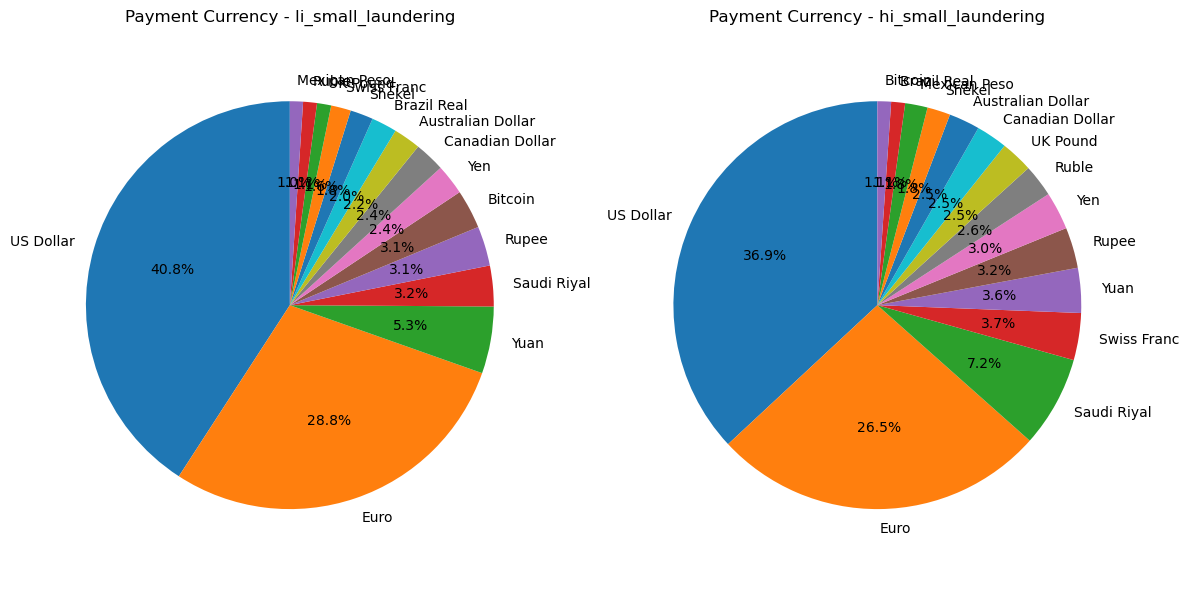

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Pie chart for "Payment Currency" in li_small_laundering
li_currency_counts = pd.Series(li_small_laundering["Payment Currency"]).value_counts()
axes[0].pie(li_currency_counts, labels=li_currency_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Payment Currency - li_small_laundering")
axes[0].axis("equal")  # Ensure the pie chart is a circle

# Pie chart for "Payment Currency" in hi_small_laundering
hi_currency_counts = pd.Series(hi_small_laundering["Payment Currency"]).value_counts()
axes[1].pie(hi_currency_counts, labels=hi_currency_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Payment Currency - hi_small_laundering")
axes[1].axis("equal")  # Ensure the pie chart is a circle

# Ensure proper layout
plt.tight_layout()  # Adjust subplot parameters for better spacing
plt.show()  # Display the plots

C:\Users\Qistina\AppData\Local\Temp\ipykernel_37856\2436074955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  li_small_laundering['Timestamp'] = pd.to_datetime(li_small_laundering['Timestamp'])
C:\Users\Qistina\AppData\Local\Temp\ipykernel_37856\2436074955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hi_small_laundering['Timestamp'] = pd.to_datetime(hi_small_laundering['Timestamp'])
C:\Users\Qistina\AppData\Local\Temp\ipykernel_37856\2436074955.py:6: SettingWithCopyWarning: 
A value is trying to

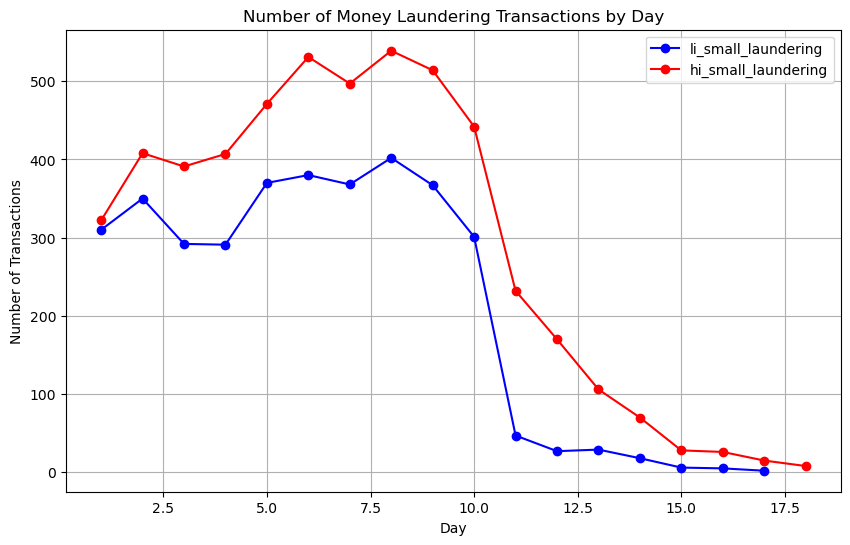

In [16]:
# Convert Timestamp to datetime
li_small_laundering['Timestamp'] = pd.to_datetime(li_small_laundering['Timestamp'])
hi_small_laundering['Timestamp'] = pd.to_datetime(hi_small_laundering['Timestamp'])

# Extract day from Timestamp
li_small_laundering['Day'] = li_small_laundering['Timestamp'].dt.day
hi_small_laundering['Day'] = hi_small_laundering['Timestamp'].dt.day

# Count number of transactions for each day
li_small_laundering_by_day = li_small_laundering.groupby('Day').size()
hi_small_laundering_by_day = hi_small_laundering.groupby('Day').size()

plt.figure(figsize=(10, 6))
plt.plot(li_small_laundering_by_day.index, li_small_laundering_by_day, 'b-o', label='li_small_laundering')
plt.plot(hi_small_laundering_by_day.index, hi_small_laundering_by_day, 'r-o', label='hi_small_laundering')

# Set titles and labels
plt.title('Number of Money Laundering Transactions by Day')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')

# Add grid and legend
plt.grid(True)
plt.legend()  # Display the legend to distinguish between the two datasets

# Show the plot
plt.show()  # Display the plot

In [17]:
from sklearn.model_selection import train_test_split

# Split ratios
ratios = {"60:40": 0.4, "70:30": 0.3, "80:20": 0.2}

shapes_info = {}

for ratio, test_size in ratios.items():
    # Split li_small with specified ratio
    li_train, li_test = train_test_split(li_small, test_size=test_size, random_state=42, shuffle=True)
    
    # Split hi_small with specified ratio
    hi_train, hi_test = train_test_split(hi_small, test_size=test_size, random_state=42, shuffle=True)
    
    # Store the shapes in the dictionary
    shapes_info[ratio] = {
        "li_small - Train Shape": li_train.shape,
        "li_small - Test Shape": li_test.shape,
        "hi_small - Train Shape": hi_train.shape,
        "hi_small - Test Shape": hi_test.shape
    }

# Output the shapes for each ratio
for ratio, shapes in shapes_info.items():
    print(f"Shapes for ratio {ratio}:")
    for name, shape in shapes.items():
        print(f"{name}: {shape}")

Shapes for ratio 60:40:
li_small - Train Shape: (4154429, 11)
li_small - Test Shape: (2769620, 11)
hi_small - Train Shape: (3047007, 11)
hi_small - Test Shape: (2031338, 11)
Shapes for ratio 70:30:
li_small - Train Shape: (4846834, 11)
li_small - Test Shape: (2077215, 11)
hi_small - Train Shape: (3554841, 11)
hi_small - Test Shape: (1523504, 11)
Shapes for ratio 80:20:
li_small - Train Shape: (5539239, 11)
li_small - Test Shape: (1384810, 11)
hi_small - Train Shape: (4062676, 11)
hi_small - Test Shape: (1015669, 11)
